# Text Classification and Word Embeddings (PyTorch)

## 2. Text Classification Defined
- **Text classification** assigns labels to text, giving meaning to words and sentences.
- Helps organize and structure **unstructured data**.
- Applications:
  - Customer sentiment analysis in reviews
  - Spam email detection
  - Tagging news articles with topics
- Types of classification:
  - **Binary**
  - **Multi-class**
  - **Multi-label**

---

## 3. Binary Classification
- Sorts text into **two categories**.
- Example: **Spam vs Not Spam** in email detection.

---

## 4. Multi-class Classification
- Categorizes text into **more than two categories**.
- Example: News article -> Politics, Sports, Technology, etc.
- Each text belongs to **exactly one category**.

---

## 5. Multi-label Classification
- Text can belong to **multiple categories simultaneously**.
- Example: A book -> Action + Adventure + Fantasy.

---

## 6. Word Embeddings
- Previous encoding techniques: **One-hot, Bag-of-Words, TF-IDF**
  - Good for preprocessing
  - But result in too many features
  - Cannot capture semantic similarity
- **Word embeddings**:
  - Represent words as **numerical vectors**
  - Preserve **semantic meaning** and relationships
  - Example: "king" ↔ "queen", "man" ↔ "woman"
- Real-world embeddings often have **high dimensionality** (not just 3D).

---

## 7. Word-to-Index Mapping
- Each word is assigned a **unique index**.
- Example:
  - "King" -> 1
  - "Queen" -> 2
- More compact and efficient than one-hot or BoW.
- Typically follows **tokenization** in the pipeline.

---

## 8. Word Embeddings in PyTorch
- PyTorch provides `torch.nn.Embedding` for creating embeddings.
- Input: word indexes
- Output: word vectors (embeddings)
- Initially random -> learned during training to capture meaning.

---

## 9. Implementing Word Embeddings with PyTorch
```
import torch
import torch.nn as nn

# Define words
words = ["The", "cat", "sat", "on", "the", "mat"]

# Word-to-index mapping
word_to_idx = {word: idx for idx, word in enumerate(words)}

# Convert to tensor of indexes
input_tensor = torch.LongTensor([word_to_idx[w] for w in words])

# Define embedding layer
embedding_dim = 10  # size of each embedding vector
embedding_layer = nn.Embedding(num_embeddings=len(words), embedding_dim=embedding_dim)

# Apply embedding
embeddings = embedding_layer(input_tensor)

print("Word-to-Index Mapping:", word_to_idx)
print("Embeddings Shape:", embeddings.shape)
print("Embeddings:", embeddings)
```
Output:

Tensor of shape (6, 10)

Each row -> embedding for a word

Each embedding vector initially contains random values

## 10. Using Embeddings in the Pipeline
Embeddings can be integrated into the Dataset + DataLoader pipeline.

Steps:

- Preprocess text

- Encode with word-to-index mapping
- 
- Apply nn.Embedding to convert indexes -> vectors

- Use Dataset + DataLoader to batch and shuffle data

- This allows models to learn semantic relationships during training

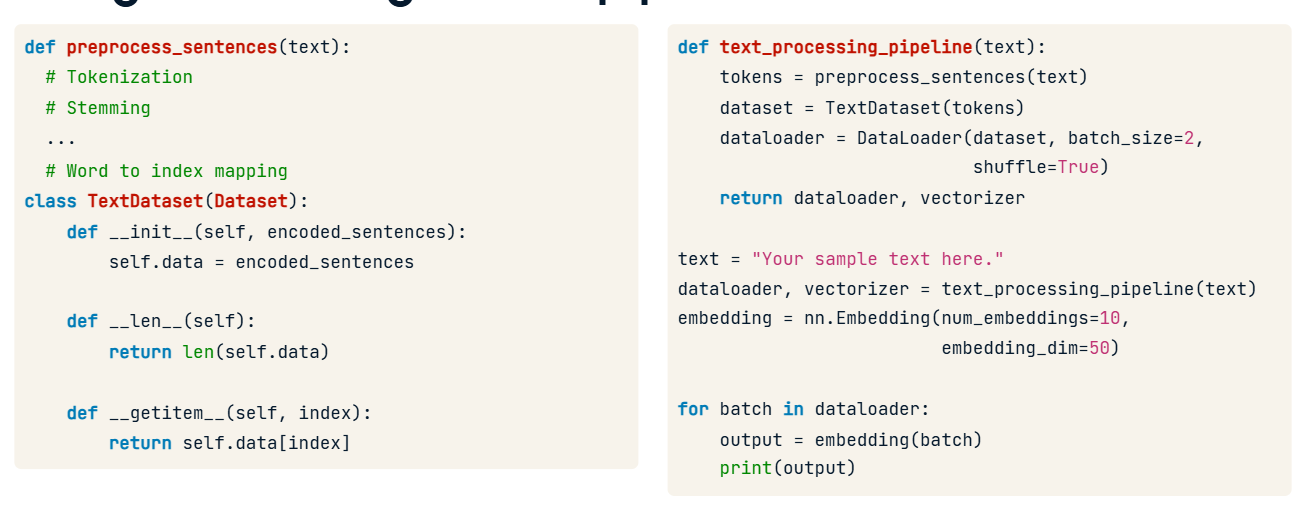

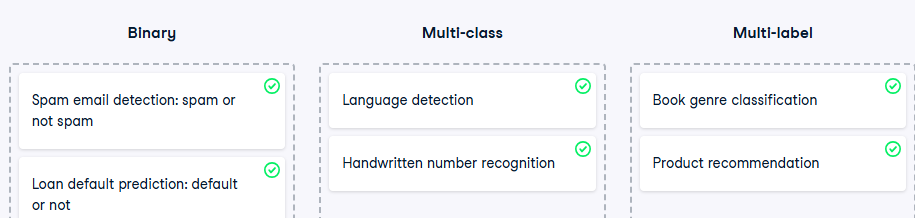

In [1]:
import torch
import torch.nn as nn

# Map a unique index to each word
words = ["This", "book", "was", "fantastic", "I", "really", "love", "science", "fiction", "but", "the", "protagonist", "was", "rude", "sometimes"]
word_to_idx = {word: i for i, word in enumerate(words)}

# Convert word_to_idx to a tensor (sequence of indices for the words)
inputs = torch.tensor([word_to_idx[w] for w in words])

# Initialize embedding layer with ten dimensions
embedding = nn.Embedding(num_embeddings=len(words), embedding_dim=10)

# Pass the tensor to the embedding layer
output = embedding(inputs)
print(output)


tensor([[ 6.9812e-01,  2.0122e+00, -2.1645e+00, -1.3072e+00,  1.5241e+00,
         -1.1996e+00,  2.4663e-01,  5.8547e-02, -2.9726e-01, -1.3653e+00],
        [-1.0386e-02, -9.4336e-01,  7.1751e-01,  3.2476e-01,  1.4209e-01,
          3.2733e-01,  1.6828e-01, -1.0895e+00, -1.0397e+00, -8.4276e-01],
        [ 1.2407e-01,  1.3065e+00, -3.4979e-01,  5.2956e-01,  1.0899e+00,
         -6.6700e-01,  6.2943e-01,  9.3141e-01, -7.4347e-01,  9.4925e-01],
        [ 5.9913e-01, -9.6407e-01,  4.4340e-01,  3.9227e-01, -1.8497e+00,
         -4.6597e-01,  4.5777e-02, -6.7483e-01, -7.7341e-01,  1.1949e+00],
        [-8.2690e-01,  1.2166e+00,  1.1156e+00,  5.5654e-01, -6.5116e-02,
          5.5926e-01,  8.7325e-01, -4.3491e-01,  9.7542e-01,  3.9521e-01],
        [ 5.2313e-01, -1.4894e+00, -9.0571e-01, -4.5474e-01, -3.1234e-01,
         -1.3691e-01, -1.7865e+00,  1.2754e+00, -1.7493e-01, -2.7766e-01],
        [-2.0804e-02, -5.1950e-01,  9.5713e-01, -7.4564e-01, -3.6788e-01,
          1.1431e+00, -1.0689e+0

In [3]:
word_to_idx

{'This': 0,
 'book': 1,
 'was': 12,
 'fantastic': 3,
 'I': 4,
 'really': 5,
 'love': 6,
 'science': 7,
 'fiction': 8,
 'but': 9,
 'the': 10,
 'protagonist': 11,
 'rude': 13,
 'sometimes': 14}

# CNNs for Text Classification (PyTorch)

## 2. CNNs for Text Classification
- CNNs are widely used for **image classification**, but they can also be applied to **text data**.
- Example: Classifying tweets as **positive, negative, or neutral**.

---

## 3. The Convolution Operation
- **Convolution**: a filter (kernel) slides over the input, performing element-wise calculations.
- Helps the model learn **word and sentence structure** and extract meaningful features.
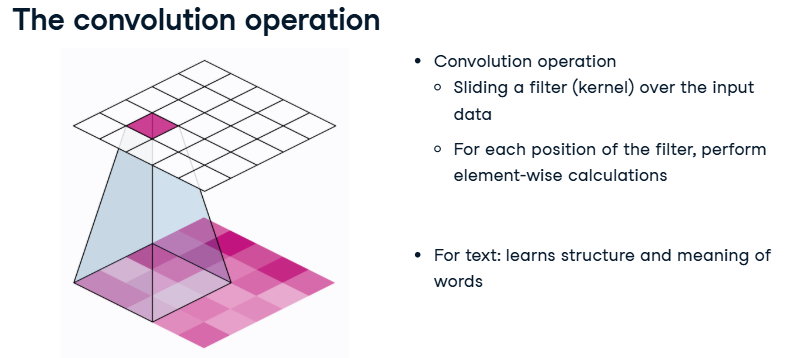


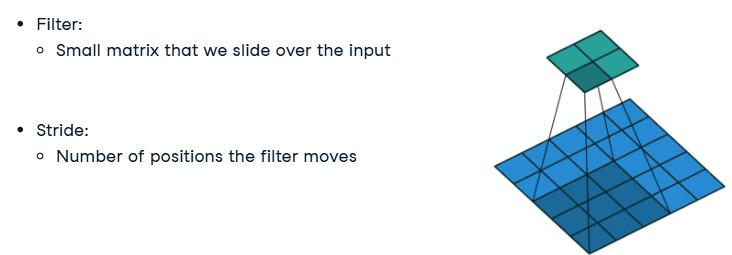

---

## 4. Filter and Stride in CNNs
- **Filter**: small matrix applied to input data (tensor).
- **Stride**: determines how many positions the filter moves each time.
- Example: a 2×2 filter with stride = 2.

---

## 5. CNN Architecture for Text
Typical architecture:
1. **Convolutional Layer** -> applies filters to detect patterns
2. **Pooling Layer** -> reduces size while preserving important information
3. **Fully Connected Layer** -> uses extracted features for final predictions

---

## 6. Implementing a Text Classification Model (CNN)
```
import torch
import torch.nn as nn
import torch.nn.functional as F

class SentimentAnalysisCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes=2):
        super(SentimentAnalysisCNN, self).__init__()
        
        # Embedding layer: converts word indexes to dense vectors
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim)
        
        # Convolutional layer: Conv1d for text (1D sequences)
        self.conv = nn.Conv1d(in_channels=embed_dim, out_channels=embed_dim,
                              kernel_size=3, stride=1, padding=1)
        
        # Fully connected layer: maps features to output classes
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        # Step 1: Embedding
        x = self.embedding(x)  # shape: [batch_size, seq_len, embed_dim]
        
        # Step 2: Permute dimensions for Conv1d
        x = x.permute(0, 2, 1)  # shape: [batch_size, embed_dim, seq_len]
        
        # Step 3: Convolution + ReLU
        x = F.relu(self.conv(x))
        
        # Step 4: Average pooling across sequence length
        x = x.mean(dim=2)  # shape: [batch_size, embed_dim]
        
        # Step 5: Fully connected layer
        x = self.fc(x)
        return x
```
## 7. Forward Pass Explained
- Input text -> embedding layer -> dense vectors

- Permute dimensions -> match Conv1d input format

 - Apply convolution + ReLU -> extract features

- Average across sequence length -> reduce dimensionality

- Fully connected layer -> final predictions

8. Preparing Data
- Create vocabulary and word-to-index mapping

- Use embeddings instead of One-Hot or TF-IDF (more efficient, captures relationships)

Example setup:

```
vocab_size = len(word_to_idx)

embed_dim = 10
```

- Two book review samples for demonstration

 - Loss function: CrossEntropyLoss

- Optimizer: SGD with learning rate = 0.1

9. Training the Model
```
# Example data
word_to_idx = {"this":0, "book":1, "is":2, "great":3, "bad":4}
samples = [
    (["this", "book", "is", "great"], 1),  # positive
    (["this", "book", "is", "bad"], 0)     # negative
]

# Initialize model
vocab_size = len(word_to_idx)
embed_dim = 10
model = SentimentAnalysisCNN(vocab_size, embed_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(10):
    for sentence, label in samples:
        # Convert words to indexes
        idxs = [word_to_idx[w] for w in sentence]
        inputs = torch.LongTensor(idxs).unsqueeze(0)  # batch of 1
        targets = torch.LongTensor([label])
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
```

# 10. Running Predictions
```
book_samples = [
    ["this", "book", "is", "great"],
    ["this", "book", "is", "bad"]
]

for sentence in book_samples:
    idxs = [word_to_idx[w] for w in sentence]
    inputs = torch.LongTensor(idxs).unsqueeze(0)
    outputs = model(inputs)
    
    # Get predicted sentiment
    _, predicted = torch.max(outputs, 1)
    sentiment = "Positive" if predicted.item() == 1 else "Negative"
    print("Review:", " ".join(sentence), "| Predicted Sentiment:", sentiment)

```

Output:

"this book is great" -> Positive

"this book is bad" -> Negative

# text with deep learning  win pytorch

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the CNN model
class TextClassificationCNN(nn.Module): 
    def __init__(self, vocab_size, embed_dim):
        super(TextClassificationCNN, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # Convolution layer
        self.conv = nn.Conv1d(in_channels=embed_dim,
                              out_channels=embed_dim,
                              kernel_size=3,
                              stride=1,
                              padding=1)
        # Fully connected layer (2 classes: Positive/Negative)
        self.fc = nn.Linear(embed_dim, 2)

    def forward(self, text):
        # text shape: (batch_size, seq_len)
        embedded = self.embedding(text)  # (batch_size, seq_len, embed_dim)
        embedded = embedded.permute(0, 2, 1) # (batch_size, embed_dim, seq_len)
        conved = F.relu(self.conv(embedded))  # (batch_size, embed_dim, seq_len)
        conved = conved.mean(dim=2)  # (batch_size, embed_dim)
        return self.fc(conved)   # (batch_size, num_classes)




In [28]:

# Build vocabulary

sentences = [
    ("I love this book".split(), 1),        # Positive
    ("I do not like this book".split(), 0)  # Negative
]

# Create word-to-index mapping
all_words = set(w for s,_ in sentences for w in s)
word_to_ix = {word: i for i, word in enumerate(all_words)}



In [29]:

# Initialize model, loss, optimizer

vocab_size = len(word_to_ix)
embed_dim = 10
model = TextClassificationCNN(vocab_size, embed_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)



In [30]:

# Training loop

for epoch in range(10):
    for sentence, label in sentences:
        # Clear gradients
        model.zero_grad()
        # Convert words to indices
        sentence_tensor = torch.LongTensor([word_to_ix.get(w, 0) for w in sentence]).unsqueeze(0)
        label_tensor = torch.LongTensor([label])
        # Forward pass
        outputs = model(sentence_tensor)
        # Compute loss
        loss = criterion(outputs, label_tensor)
        # Backpropagation
        loss.backward()
        optimizer.step()

print("Training complete!\n")



Training complete!



In [31]:

# Inference on new reviews

book_reviews = [
    "I don't not like this book".split(),
    "I do not like this book".split(),
    "I hate this book literally".split(),
    "This book is a state of and art".split(),
    "i like it noice".split()
]

for review in book_reviews:
    input_tensor = torch.LongTensor([word_to_ix.get(w, 0) for w in review]).unsqueeze(0)
    outputs = model(input_tensor)
    _, predicted_label = torch.max(outputs.data, 1)
    sentiment = "Positive" if predicted_label.item() == 1 else "Negative"
    print(f"Book Review: {' '.join(review)}")
    print(f"Sentiment: {sentiment}\n")

Book Review: I don't not like this book
Sentiment: Negative

Book Review: I do not like this book
Sentiment: Negative

Book Review: I hate this book literally
Sentiment: Positive

Book Review: This book is a state of and art
Sentiment: Negative

Book Review: i like it noice
Sentiment: Negative



# Deep Learning Notes: Text Processing with RNNs, LSTMs, and GRUs

---

## **2. RNNs for Text**
- **Recurrent Neural Networks (RNNs)** are designed to handle sequences of varying lengths.  
- They maintain an **internal short-term memory**, enabling learning of patterns across time.  
- **Difference from CNNs**:  
  - CNNs detect local patterns in chunks.  
  - RNNs remember past words to understand the **whole sentence meaning**.  
- **Use Case**: Text classification tasks.

---

## **3. RNNs for Text Classification**
- RNNs process sequential data **one word at a time**, similar to how humans read.  
- This allows them to capture **context + order of words**.  
- Example:  
  - Tweet: *"I just love getting stuck in traffic"*  
  - RNN can classify it as **sarcastic**.

---

## **4. Recap: Dataset and DataLoader in PyTorch**
We use **PyTorch Dataset + DataLoader** to organize text data.

### Key Methods:
- `__init__`: Initializes dataset with input text.  
- `__len__`: Returns total samples.  
- `__getitem__`: Accesses a sample at a given index.  

###  Example Code:
```
import torch
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]
```
# Example usage
texts = ["I love this movie", "I hate this movie"]
labels = [1, 0]  # 1 = Positive, 0 = Negative

dataset = TextDataset(texts, labels)
loader = DataLoader(dataset, batch_size=2, shuffle=True)


#### 5. RNN Implementation (Sentiment Analysis)
- Task: Classify movie reviews as Positive or Negative.

~Pipeline:~

    - Preprocess text → tensor.
    
    - Encode/Embed words.
    
    - Pass tensor through RNN model.
    
    - Output sentiment prediction.

#### Example Code:
```
import torch
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]   # Take last hidden state
        out = self.fc(out)
        return out

# Example: Sentiment prediction
model = RNNModel(input_size=10, hidden_size=20, output_size=2)
```
### 6. RNN Variation: LSTM
- Problem: RNNs struggle with complex sentences containing nuances/conflicting sentiments.

- Solution: Long Short-Term Memory (LSTM) networks.

- LSTMs capture long-term dependencies and subtle emotions.

  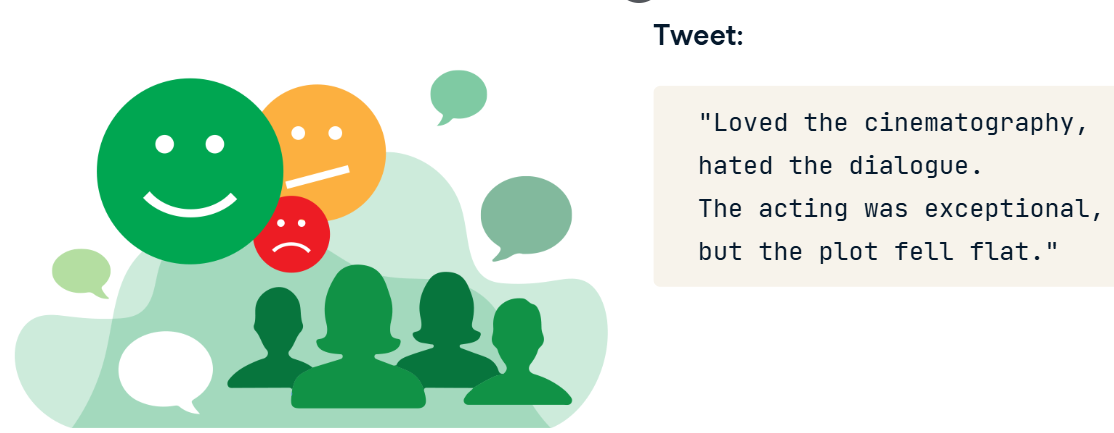

Example:

- Tweet: "Loved the cinematography, hated the dialogue. Acting was exceptional, but plot fell flat."

- LSTM can correctly capture mixed sentiments.

7. LSTM Architecture
- LSTMs use Input, Forget, and Output Gates to decide what to store/forget.

- Ideal for complex classification tasks.

 Example Code:
```
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]   # Last hidden state
        out = self.fc(out)
        return out

# Example usage
model = LSTMModel(input_size=10, hidden_size=20, output_size=2)
```

8. RNN Variation: GRU
- Gated Recurrent Unit (GRU) is a simplified version of LSTM.

- Faster training, fewer parameters.

Suitable for tasks like:

- Spam detection

- Sentiment analysis

- Text summarization
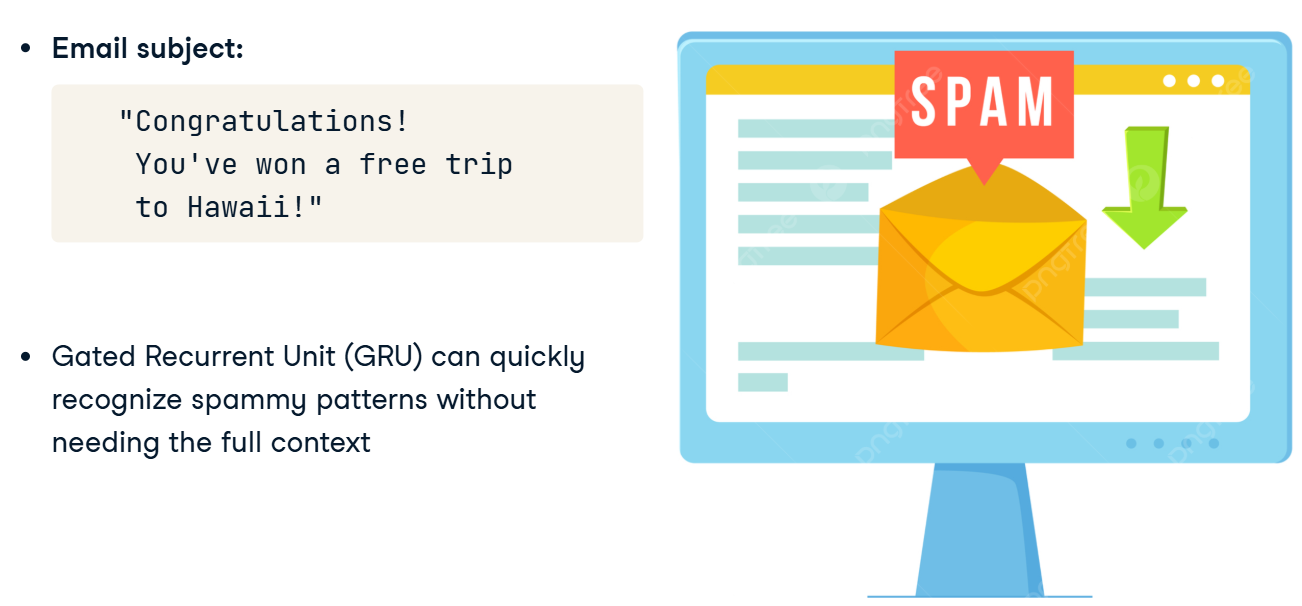
Example:
- Email subject: "Congratulations! You've won a free trip to Hawaii!"

- GRU can quickly classify as Spam.

9. GRU Architecture
    GRUs trade complexity for speed.
    
    Similar forward pass as LSTM, but with fewer gates.


 Example Code:
```
import torch
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]   # Last hidden state
        out = self.fc(out)
        return out

# Example usage
model = GRUModel(input_size=10, hidden_size=20, output_size=2)
```

# RNN
As a data analyst at PyBooks, you often encounter datasets that contain sequential information, such as customer interactions, time series data, or text documents. RNNs can effectively analyze and extract insights from such data. In this exercise, you will dive into the Newsgroup dataset that has already been processed and encoded for you. This dataset comprises articles from different categories. Your task is to apply an RNN to classify these articles into three categories:

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim



In [18]:
sentences = [
    # Positive
    "i love this movie",
    "this film was great",
    "i enjoyed the acting",
    "the plot was amazing",
    "fantastic direction and story",
    "wonderful performance by the cast",
    "i really liked this film",
    "such a good movie",
    "the soundtrack was excellent",
    "brilliant and inspiring film",

    # Negative
    "i hate this movie",
    "this film was terrible",
    "the acting was awful",
    "the plot was boring",
    "bad direction and story",
    "poor performance by the cast",
    "i really disliked this film",
    "such a bad movie",
    "the soundtrack was horrible",
    "dull and disappointing film",
]

labels = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,   # positives
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0    # negatives
]


In [34]:
# nested for loo
# list of sentence > words in sentence> each word in index so whenever we get same word we can track them 
word2idx = {}
for sent in sentences:
    for word in sent.split():
        if word not in word2idx:
            word2idx[word] = len(word2idx)

vocab_size = len(word2idx)
print("Vocabulary:", word2idx)



Vocabulary: {'i': 0, 'love': 1, 'this': 2, 'movie': 3, 'film': 4, 'was': 5, 'great': 6, 'enjoyed': 7, 'the': 8, 'acting': 9, 'plot': 10, 'amazing': 11, 'fantastic': 12, 'direction': 13, 'and': 14, 'story': 15, 'wonderful': 16, 'performance': 17, 'by': 18, 'cast': 19, 'really': 20, 'liked': 21, 'such': 22, 'a': 23, 'good': 24, 'soundtrack': 25, 'excellent': 26, 'brilliant': 27, 'inspiring': 28, 'hate': 29, 'terrible': 30, 'awful': 31, 'boring': 32, 'bad': 33, 'poor': 34, 'disliked': 35, 'horrible': 36, 'dull': 37, 'disappointing': 38}


In [35]:

def encode_sentence(sent):
    return [word2idx[w] for w in sent.split()]

encoded = [encode_sentence(s) for s in sentences]
max_len = max(len(s) for s in encoded)

X = torch.zeros(len(encoded), max_len, dtype=torch.long)
for i, seq in enumerate(encoded):
    X[i, :len(seq)] = torch.tensor(seq)

y = torch.tensor(labels)


In [36]:

class TextRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_classes):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        x = self.embed(x)                     
        h0 = torch.zeros(1, x.size(0), self.rnn.hidden_size)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]                  
        return self.fc(out)


In [37]:

model = TextRNN(vocab_size, embed_dim=8, hidden_size=16, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [38]:

for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.6908
Epoch 2, Loss: 0.6821
Epoch 3, Loss: 0.6707
Epoch 4, Loss: 0.6599
Epoch 5, Loss: 0.6460
Epoch 6, Loss: 0.6282
Epoch 7, Loss: 0.6070
Epoch 8, Loss: 0.5805
Epoch 9, Loss: 0.5483
Epoch 10, Loss: 0.5118


In [39]:
test_sentence = "  disappointing and fantastic"
test_encoded = encode_sentence(test_sentence)
test_tensor = torch.zeros(1, max_len, dtype=torch.long)
test_tensor[0, :len(test_encoded)] = torch.tensor(test_encoded)
pred = model(test_tensor).argmax(dim=1).item()
print("Prediction for:", test_sentence, "->", pred)

Prediction for:   disappointing and fantastic -> 1


# Building an LSTM model for text
At PyBooks, the team is constantly seeking to enhance the user experience by leveraging the latest advancements in technology. In line with this vision, they have assigned you a critical task. The team wants you to explore the potential of another powerful tool: LSTM, known for capturing more complexities in data patterns. 

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

sentences = [
    "i love this movie",
    "this film was great",
    "fantastic acting and story",
    "wonderful performance by the cast",
    "i hate this movie",
    "this film was terrible",
    "awful acting and boring plot",
    "poor direction and weak story",
    "film was supa dupa amazing"
]
labels = [1, 1, 1, 1, 0, 0, 0, 0, 1]   # 1 = positive, 0 = negative




In [49]:

word2idx = {}
for sent in sentences:
    for word in sent.split():
        if word not in word2idx:
            word2idx[word] = len(word2idx)

vocab_size = len(word2idx)
print("Vocabulary:", word2idx)


Vocabulary: {'i': 0, 'love': 1, 'this': 2, 'movie': 3, 'film': 4, 'was': 5, 'great': 6, 'fantastic': 7, 'acting': 8, 'and': 9, 'story': 10, 'wonderful': 11, 'performance': 12, 'by': 13, 'the': 14, 'cast': 15, 'hate': 16, 'terrible': 17, 'awful': 18, 'boring': 19, 'plot': 20, 'poor': 21, 'direction': 22, 'weak': 23, 'supa': 24, 'dupa': 25, 'amazing': 26}


In [50]:

def encode(sent):
    return [word2idx[w] for w in sent.split()]

encoded = [encode(s) for s in sentences]
max_len = max(len(seq) for seq in encoded)

X = torch.zeros(len(encoded), max_len, dtype=torch.long)
for i, seq in enumerate(encoded):
    X[i, :len(seq)] = torch.tensor(seq)

y = torch.tensor(labels)



In [51]:

class TextLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_layers, num_classes):
        super(TextLSTM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        x = self.embed(x)  # (batch, seq_len, embed_dim)
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]   # last timestep
        return self.fc(out)
        
model = TextLSTM(vocab_size, embed_dim=16, hidden_size=32, num_layers=2, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)



In [52]:

for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.7060
Epoch 2, Loss: 0.6749
Epoch 3, Loss: 0.6412
Epoch 4, Loss: 0.5958
Epoch 5, Loss: 0.5227
Epoch 6, Loss: 0.4155
Epoch 7, Loss: 0.2948
Epoch 8, Loss: 0.1947
Epoch 9, Loss: 0.1318
Epoch 10, Loss: 0.0811


In [53]:

test_sentence = "great terrible and amazing acting"
test_encoded = encode(test_sentence)
test_tensor = torch.zeros(1, max_len, dtype=torch.long)
test_tensor[0, :len(test_encoded)] = torch.tensor(test_encoded)
pred = model(test_tensor).argmax(dim=1).item()
print("Prediction for:", test_sentence, "->", pred)

Prediction for: great terrible and amazing acting -> 1


# Building a GRU model for text
At PyBooks, the team has been impressed with the performance of the two models you previously trained. However, in their pursuit of excellence, they want to ensure the selection of the absolute best model for the task at hand. Therefore, they have asked you to further expand the project by experimenting with the capabilities of GRU models, renowned for their efficiency and effectiveness in text classification tasks. Your new assignment is to apply the GRU model to classify articles from the Newsgroup dataset into the following categories:

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim


In [60]:
sentences = [
    "i love this movie",
    "this film was great",
    "fantastic acting and story",
    "wonderful performance by the cast",
    "i hate this movie",
    "this film was terrible",
    "awful acting and boring plot",
    "poor direction and weak story",
]
labels = [1, 1, 1, 1, 0, 0, 0, 0]   


In [63]:

word2idx = {}
for sent in sentences:
    for word in sent.split():
        if word not in word2idx:
            word2idx[word] = len(word2idx)

vocab_size = len(word2idx)

def encode(sent):
    return [word2idx[w] for w in sent.split()]

encoded = [encode(s) for s in sentences]
max_len = max(len(seq) for seq in encoded)

X = torch.zeros(len(encoded), max_len, dtype=torch.long)
for i, seq in enumerate(encoded):
    X[i, :len(seq)] = torch.tensor(seq)

y = torch.tensor(labels)

class GRUTextModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, num_layers, num_classes):
        super(GRUTextModel, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.gru = nn.GRU(embed_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        x = self.embed(x)  # (batch, seq_len, embed_dim)
        h0 = torch.zeros(self.gru.num_layers, x.size(0), self.gru.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = out[:, -1, :]   # last timestep
        return self.fc(out)


In [64]:
gru_model = GRUTextModel(vocab_size=vocab_size, embed_dim=16, hidden_size=32, num_layers=2, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gru_model.parameters(), lr=0.01)

for epoch in range(10):
    optimizer.zero_grad()
    outputs = gru_model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.6777
Epoch 2, Loss: 0.6339
Epoch 3, Loss: 0.5787
Epoch 4, Loss: 0.5054
Epoch 5, Loss: 0.4133
Epoch 6, Loss: 0.2971
Epoch 7, Loss: 0.1755
Epoch 8, Loss: 0.0945
Epoch 9, Loss: 0.0431
Epoch 10, Loss: 0.0185


In [65]:
test_sentence = "great movie and terrible acting"
test_encoded = encode(test_sentence)
test_tensor = torch.zeros(1, max_len, dtype=torch.long)
test_tensor[0, :len(test_encoded)] = torch.tensor(test_encoded)
pred = gru_model(test_tensor).argmax(dim=1).item()
print("Prediction for:", test_sentence, "->", pred)


Prediction for: great movie and terrible acting -> 0


# Evaluation Metrics for Text Classification with RNNs

---

## 1. Why Evaluation Metrics Matter

Evaluation metrics determine how reliable your model’s predictions are. For example, a sentiment analysis model may claim a book has mostly negative reviews—metrics help verify whether such predictions are trustworthy.

---

## 2. Evaluation Workflow for RNN Models

Before calculating metrics, you typically:

1. Pass the **test dataset** through the trained RNN model.
2. Get class probability outputs for each sample.
3. Use `torch.max(outputs, 1)[1]` to obtain predicted class indices.

---

## 3. Accuracy

**Definition:** The proportion of correct predictions out of total predictions.

* Implemented via `torchmetrics.Accuracy`.
* For binary classification, use: `task="binary"` and `num_classes=2`.
* Range: **0 to 1**.

  * Example: `0.66` → ~66% correct predictions.

### Example

```python
import torch
import torchmetrics

actual = torch.tensor([0, 1, 1, 0, 1])
predicted = torch.tensor([0, 1, 0, 0, 1])

accuracy = torchmetrics.Accuracy(task="binary", num_classes=2)
score = accuracy(predicted, actual)
print("Accuracy:", score.item())
```

### Limitation

Accuracy may be misleading in **imbalanced datasets**.
Example: 9,800 positive and 200 negative samples → predicting all as positive gives **98% accuracy** but fails to detect negatives.

---

## 4. Beyond Accuracy

When dealing with imbalanced data, use:

* **Precision**: confidence in positive predictions.
* **Recall**: ability to detect actual positives.
* **F1 Score**: balance of precision and recall.

---

## 5. Precision & Recall

**Precision** = Correct positive predictions ÷ Total predicted positives.

**Recall** = Correct positive predictions ÷ Actual positives.

Both range from **0 to 1**.

### Example

```python
from torchmetrics import Precision, Recall

precision = Precision(task="binary", num_classes=2)
recall = Recall(task="binary", num_classes=2)

prec_score = precision(predicted, actual)
rec_score = recall(predicted, actual)

print("Precision:", prec_score.item())
print("Recall:", rec_score.item())
```

Example Interpretation:

* Precision = 0.66 → 66% of predicted positives were correct.
* Recall = 0.50 → 50% of actual positives were detected.

---

## 6. F1 Score

**Definition:** Harmonic mean of precision and recall.

* Helps when classes are imbalanced.
* Range: **0 to 1**.

### Example

```python
from torchmetrics import F1Score

f1 = F1Score(task="binary", num_classes=2)
f1_score = f1(predicted, actual)

print("F1 Score:", f1_score.item())
```

Example Interpretation:

* F1 = 0.57 → reasonable balance between precision and recall.

---

## 7. Multi-Class Notes

In multi-class classification, metrics may align closely when performance is consistent across classes. Always interpret metrics with respect to the dataset and goal.

---

## 8. Key Takeaways

* **Accuracy**: Simple but unreliable for imbalanced datasets.
* **Precision**: Reliability of positive predictions.
* **Recall**: Detection of actual positives.
* **F1 Score**: Balanced metric for imbalances.
* Always interpret metrics within the context of the problem.


# Text Generation and NLP with RNNs

---

## 1. Introduction to Text Generation and NLP

Text generation is an essential task in Natural Language Processing (NLP). It powers applications such as:

* Chatbots
* Language translation
* Text completion
* Technical writing assistants

Recurrent Neural Networks (RNNs), including LSTMs and GRUs, capture sequential patterns by remembering prior context.

**Example:**
Input: `"The cat is on the m"` → Model predicts → `"mat"`.

---

## 2. Building an RNN for Text Generation (PyTorch)

We build a simple character-level RNN model using the sample dataset:

```
"Hello how are you?"
```

### Workflow:

1. Extract unique characters.
2. Create character-to-index and index-to-character mappings.
3. Convert text into numeric indices.
4. One-hot encode inputs.
5. Feed into RNN → predict next character.

---

## 3. RNN Model Definition

### Code

```python
import torch
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)  # initial hidden state
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # use the last time step output
        return out
```

---

## 4. Forward Propagation and Model Setup

### Details:

* Hidden state initialized to zeros.
* RNN processes sequence + hidden state.
* Last time step output passed through a linear layer.

### Model Initialization

```python
model = RNNModel(input_size=1, hidden_size=16, output_size=1)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
```

---

## 5. Preparing Input and Target Data

### Steps:

* Inputs = all characters except the last one.
* Targets = all characters except the first one.
* Inputs one-hot encoded.
* Targets stay as indices.

### Code

```python
data = "Hello how are you?"
chars = list(set(data))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

inputs = [char_to_idx[ch] for ch in data[:-1]]
targets = [char_to_idx[ch] for ch in data[1:]]

inputs = torch.tensor(inputs).long().unsqueeze(1)
targets = torch.tensor(targets).long()

inputs_onehot = torch.nn.functional.one_hot(inputs, num_classes=len(chars)).float()
```

---

## 6. Training the RNN Model

Train for 100 epochs:

* Switch to training mode
* Feed input
* Compute loss
* Backpropagate
* Update weights

### Code

```python
for epoch in range(100):
    model.train()
    outputs = model(inputs_onehot)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")
```

---

## 7. Testing the Model

### Steps:

1. Evaluation mode.
2. Input a test character (e.g., `'h'`).
3. Convert to index.
4. One-hot encode.
5. Predict next character.

### Code

```python
model.eval()
test_char = 'h'
test_idx = char_to_idx[test_char]

test_input = torch.nn.functional.one_hot(
    torch.tensor([[test_idx]]),
    num_classes=len(chars)
).float()

predicted_output = model(test_input)
predicted_idx = torch.argmax(predicted_output, dim=1).item()
print("Prediction for 'h':", idx_to_char[predicted_idx])
```

---

## 8. Key Takeaways

* Text generation is a fundamental component of NLP.
* RNNs, LSTMs, and GRUs are effective for sequence learning.
* Character-level RNNs simplify modeling for small datasets.
* Training involves one-hot encoding and next-character prediction.
* Model can learn patterns such as `'h' → 'e'`.

---


### Next word prediction 
At PyBooks, you've been tasked to develop an algorithm that can perform text generation. The project involves auto-completion of book names. To kickstart this project, you decide to experiment with a Recurrent Neural Network (RNN). This way, you can understand the nuances of RNNs before moving to more complex models.

In [72]:
import torch
import torch.nn as nn

# ----- Character set -----
chars = list("abcdefghijklmnopqrstuvwxyz ")
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

# ----- Example training text -----
text = "hello world"
seq_len = len(text) - 1

# Encode text into indices
encoded = [char_to_ix[ch] for ch in text]

# Inputs: one-hot vectors for each character except last
inputs = nn.functional.one_hot(torch.tensor(encoded[:-1]).view(-1, 1),
                               num_classes=len(chars)).float()

# Targets: next character indices
targets = torch.tensor(encoded[1:])

print("Inputs shape:", inputs.shape)   # (seq_len, 1, vocab_size)
print("Targets shape:", targets.shape) # (seq_len,)


Inputs shape: torch.Size([10, 1, 27])
Targets shape: torch.Size([10])


In [75]:
# Include an RNN layer and linear layer in RNNmodel class
class RNNmodel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNmodel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
      h0 = torch.zeros(1, x.size(0), self.hidden_size)
      out, _ = self.rnn(x, h0)  
      out = self.fc(out[:, -1, :])  
      return out

# Instantiate the RNN model
model = RNNmodel(input_size=27, hidden_size=16, output_size=27)


In [131]:
import torch
import torch.nn as nn


In [132]:
# Example data excerpt (Alice in Wonderland or any text)
data = (
    "The Project Gutenberg eBook of The Complete Works of William Shakespeare, by William Shakespeare "
    "This eBook is for the use of anyone anywhere in the United States and most other parts of the world "
    "at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it "
    "under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. "
    "If you are not located in the United States, you will have to check the laws of the country where you are "
    "located before using this eBook. "
    "Title: The Complete Works of William Shakespeare "
    "Author: William Shakespeare "
    "Release Date: January 1994 [eBook #100] [Most recently updated: May 18, 2023] "
    "Language: English "
    "The Complete Works of William Shakespeare by William Shakespeare "
    "Contents THE SONNETS ALL’S WELL THAT ENDS WELL THE TRAGEDY OF ANTONY AND CLEOPATRA AS YOU LIKE IT "
    "THE COMEDY OF ERRORS THE TRAGEDY OF CORIOLANUS CYMBELINE THE TRAGEDY OF HAMLET, PRINCE OF DENMARK "
    "THE FIRST PART OF KING HENRY THE FOURTH THE SECOND PART OF KING HENRY THE FOURTH THE LIFE OF KING HENRY THE FIFTH "
    "THE FIRST PART OF HENRY THE SIXTH THE SECOND PART OF KING HENRY THE SIXTH THE THIRD PART OF KING HENRY THE SIXTH "
    "KING HENRY THE EIGHTH THE LIFE AND DEATH OF KING JOHN THE TRAGEDY OF JULIUS CAESAR THE TRAGEDY OF KING LEAR "
    "LOVE’S LABOUR’S LOST THE TRAGEDY OF MACBETH MEASURE FOR MEASURE THE MERCHANT OF VENICE THE MERRY WIVES OF WINDSOR "
    "A MIDSUMMER NIGHT’S DREAM MUCH ADO ABOUT NOTHING THE TRAGEDY OF OTHELLO, THE MOOR OF VENICE PERICLES, PRINCE OF TYRE "
    "KING RICHARD THE SECOND KING RICHARD THE THIRD THE TRAGEDY OF ROMEO AND JULIET THE TAMING OF THE SHREW THE TEMPEST "
    "THE LIFE OF TIMON OF ATHENS THE TRAGEDY OF TITUS ANDRONICUS TROILUS AND CRESSIDA TWELFTH NIGHT; OR, WHAT YOU WILL "
    "THE TWO GENTLEMEN OF VERONA THE TWO NOBLE KINSMEN THE WINTER’S TALE A LOVER’S COMPLAINT THE PASSIONATE PILGRIM "
    "THE PHOENIX AND THE TURTLE THE RAPE OF LUCRECE VENUS AND ADONIS "
    "THE SONNETS 1 From fairest creatures we desire increase, That thereby beauty’s rose might never die, "
    "But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, "
    "Feed’st thy light’s flame with self-substantial fuel, Making a famine where abundance lies, Thyself thy foe, to thy sweet self too cruel: "
    "Thou that art now the world’s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content."
)


# Build character vocabulary from the data excerpt
import string
chars = list(string.ascii_lowercase + " ")
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}
# Lowercase and filter only a–z and space
data_clean = "".join(ch for ch in data.lower() if ch in chars)

# Encode the cleaned data
encoded = [char_to_ix[ch] for ch in data_clean]


In [133]:

# Build input–target pairs (predict next char)
inputs = nn.functional.one_hot(
    torch.tensor(encoded[:-1]).view(1, -1),   # batch=1, seq_len
    num_classes=len(chars)
).float()  # shape: (1, seq_len, vocab_size)

targets = torch.tensor(encoded[1:])          # next char indices



In [134]:
# Define RNN model
class RNNmodel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNmodel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # last timestep
        return out



In [141]:
# Instantiate the RNN model
model = RNNmodel(input_size=len(chars), hidden_size=26, output_size=len(chars))

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(100):
    model.train()
    outputs = model(inputs)
    loss = criterion(outputs, targets[-1].unsqueeze(0))  # match batch size
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/100, Loss: {loss.item():.9f}')


Epoch 10/100, Loss: 0.294764906
Epoch 20/100, Loss: 0.007448757
Epoch 30/100, Loss: 0.001520193
Epoch 40/100, Loss: 0.000790760
Epoch 50/100, Loss: 0.000601945
Epoch 60/100, Loss: 0.000533677
Epoch 70/100, Loss: 0.000502579
Epoch 80/100, Loss: 0.000483992
Epoch 90/100, Loss: 0.000469932
Epoch 100/100, Loss: 0.000457897


In [146]:

# Test the model
model.eval()
test_input = char_to_ix['i']
test_input = nn.functional.one_hot(
    torch.tensor(test_input).view(1, 1),
    num_classes=len(chars)
).float()
predicted_output = model(test_input)
predicted_char_ix = torch.argmax(predicted_output, 1).item()
print(f"Test Input: 'i', Predicted Output: '{ix_to_char[predicted_char_ix]}'")


Test Input: 'i', Predicted Output: 't'
